In [1]:
run src/preprocessing.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [4]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model' : model, 
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n, 
            'rmse_train' : np.sqrt(mean_squared_error(y_samp, train_pred)),
            'rmse_test' : np.sqrt(mean_squared_error(y_test, test_pred)),
            'mae_train' : mean_absolute_error(y_samp, train_pred),
            'mae_test' : mean_absolute_error(y_test, test_pred),
            'r2_train_score' : model.score(X_samp, y_samp),
            'r2_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## Variable Ranking - by Single Feature $R^2$ Score 

In [5]:
test_scores = []
for feature in dataset_2.columns:
    results = run_model(Lasso(alpha=100), 'variable ranking', 50, dataset_2[[feature]], target_2)
    test_score = results['r2_test_score']
    if test_score > 0.3:
        test_scores.append({'feature': feature, 'score' : test_score})

In [6]:
results = pd.DataFrame(test_scores).sort_values('score', ascending=False)
results.head(20)

,feature,score
5,PC 1,0.638048
4,GrLivArea,0.439422
2,GarageCars_3,0.396069
0,ExterQual_TA,0.364485
3,FirstFlrSF,0.360362
1,FullBath_1,0.330004


In [7]:
test_scores = []
for feature in dataset_4.columns:
    results = run_model(Lasso(), 'variable ranking', 50, dataset_4[[feature]], target_4)
    test_score = results['r2_test_score']
    if test_score > 0.2:
        test_scores.append({'feature': feature, 'score' : test_score})

In [8]:
results = pd.DataFrame(test_scores).sort_values('score', ascending=False)
results.head(20)

,feature,score
21,PC 1,0.529066
3,GrLivArea,0.439198
16,GarageCars_3,0.396864
12,ExterQual_TA,0.364821
2,FirstFlrSF,0.360158
9,FullBath_1,0.330278
0,YearBuilt,0.291891
17,BsmtQual_Ex,0.283994
5,KitchenQual_TA,0.279176
11,Foundation_PConc,0.276741


In [9]:
performant_features = pd.DataFrame()
performant_features['test_1'] = list(results.head(20).feature.values)
performant_features

,test_1
0,PC 1
1,GrLivArea
2,GarageCars_3
3,ExterQual_TA
4,FirstFlrSF
5,FullBath_1
6,YearBuilt
7,BsmtQual_Ex
8,KitchenQual_TA
9,Foundation_PConc


In [10]:
features_to_test = []
test_results = {}
for i, feature in enumerate(performant_features.test_1):
    features_to_test.append(feature)
    if i < 7: print(features_to_test)
    test_results[feature] = run_model(Lasso(), 'variable ranking', 100, dataset_4[features_to_test], target_4)

['PC 1']
['PC 1', 'GrLivArea']
['PC 1', 'GrLivArea', 'GarageCars_3']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF', 'FullBath_1']
['PC 1', 'GrLivArea', 'GarageCars_3', 'ExterQual_TA', 'FirstFlrSF', 'FullBath_1', 'YearBuilt']


In [11]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[pd.Index(features_to_test)]
performant_features['test_1_r2'] = test_results.r2_test_score.values
test_results

,fit_time,mae_test,mae_train,model,model_name,n,n_pcnt,r2_test_score,r2_train_score,rmse_test,rmse_train,test_pred_time,train_pred_time
PC 1,0.000314951,34411.9,36164.3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.52441,0.515181,51428.1,56105.5,6.91414e-06,6.91414e-06
GrLivArea,1.40667e-05,32250.7,33149.4,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.609907,0.649073,46576.7,47733.5,8.58307e-06,9.53674e-06
GarageCars_3,1.28746e-05,27089.7,29580.2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.704973,0.717685,40505.7,42813.6,8.34465e-06,1.00136e-05
ExterQual_TA,1.0252e-05,27160.7,29481.6,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.708974,0.719097,40230,42706.5,7.15256e-06,9.29832e-06
FirstFlrSF,1.28746e-05,24969.4,27802.6,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.74056,0.744501,37984.2,40729.6,9.05991e-06,9.77516e-06
FullBath_1,1.09673e-05,25078.1,27634.4,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.742397,0.754655,37849.5,39912,8.34465e-06,9.05991e-06
YearBuilt,1.16825e-05,24842.7,27247.7,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.745128,0.759213,37648.3,39539.6,6.19888e-06,7.39098e-06
BsmtQual_Ex,1.09673e-05,24072.9,25286.6,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.771795,0.789344,35624.4,36983,1.07288e-05,8.82149e-06
KitchenQual_TA,1.0252e-05,23973.1,25261.3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.774039,0.790125,35448.8,36914.4,1.07288e-05,6.91414e-06
Foundation_PConc,1.07288e-05,23870,25179.9,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",variable ranking,1083,100,0.775191,0.790451,35358.3,36885.7,7.15256e-06,8.34465e-06


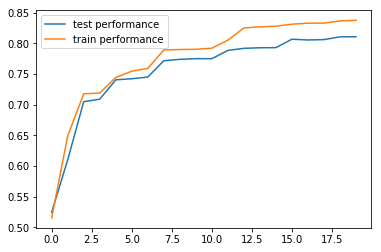

In [12]:
plt.plot(range(len(features_to_test)), test_results.loc[features_to_test].r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.loc[features_to_test].r2_train_score, label='train performance')
plt.legend()

## Variable-Ranking - By Regression Coefficient in Full Model

In [13]:
results = run_model(Lasso(alpha=100), 'ridge', 100, dataset_2, target_2)

In [14]:
results

{'model': Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'model_name': 'ridge',
 'n_pcnt': 100,
 'n': 1083,
 'rmse_train': 19977.653569100323,
 'rmse_test': 26760.935210610649,
 'mae_train': 13914.007755835702,
 'mae_test': 16624.53190493795,
 'r2_train_score': 0.93853071381302722,
 'r2_test_score': 0.87122453684480861,
 'fit_time': 9.298324584960938e-06,
 'train_pred_time': 7.62939453125e-06,
 'test_pred_time': 8.106231689453125e-06}

In [15]:
lasso_model = results['model']

In [16]:
coefficients = lasso_model.coef_
features = dataset_2.columns
coefficients = pd.Series(coefficients.T.ravel(), index=features)
coefficients.head()

MSSubClass_20   -0.0
MSSubClass_30    0.0
MSSubClass_40    0.0
MSSubClass_45    0.0
MSSubClass_50   -0.0
dtype: float64

In [17]:
sorted_coefs = np.abs(coefficients).sort_values(ascending=False)
sorted_coefs.head(20)

OverallQual_10          96971.517439
FullBath_3              45785.603917
OverallQual_9           43240.159907
RoofMatl_WdShngl        39106.476108
TotRmsAbvGrd_12         31466.959467
Neighborhood_NoRidge    31182.564998
KitchenQual_Ex          24809.058449
Neighborhood_Crawfor    21986.587647
OverallQual_8           20238.243822
GrLivArea               19031.235989
Exterior1st_BrkFace     18820.751191
Neighborhood_StoneBr    17935.499896
BsmtQual_Ex             17046.820939
BsmtExposure_Gd         15744.153774
Functional_Typ          14676.023319
OverallCond_3           14206.440362
KitchenAbvGr_1          12418.167733
TotRmsAbvGrd_10         11924.511778
GarageCars_3             9903.787032
GarageType_2Types        9745.776166
dtype: float64

In [18]:
performant_features['test_2'] = list(list(sorted_coefs.head(20).index))
performant_features

,test_1,test_1_r2,test_2
0,PC 1,0.52441,OverallQual_10
1,GrLivArea,0.609907,FullBath_3
2,GarageCars_3,0.704973,OverallQual_9
3,ExterQual_TA,0.708974,RoofMatl_WdShngl
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12
5,FullBath_1,0.742397,Neighborhood_NoRidge
6,YearBuilt,0.745128,KitchenQual_Ex
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor
8,KitchenQual_TA,0.774039,OverallQual_8
9,Foundation_PConc,0.775191,GrLivArea


In [19]:
features_to_test = []
test_results = {}
for feature in performant_features.test_2:
    print(dataset_2[features_to_test].shape)
    features_to_test.append(feature)
    test_results[feature] = run_model(Lasso(alpha=100), 'lasso', 100,
                                      dataset_2[features_to_test],
                                      target_2)

(1444, 0)
(1444, 1)
(1444, 2)
(1444, 3)
(1444, 4)
(1444, 5)
(1444, 6)
(1444, 7)
(1444, 8)
(1444, 9)
(1444, 10)
(1444, 11)
(1444, 12)
(1444, 13)
(1444, 14)
(1444, 15)
(1444, 16)
(1444, 17)
(1444, 18)
(1444, 19)


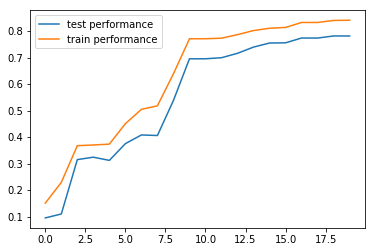

In [20]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_2_r2'] = test_results.r2_test_score.values

plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()

In [21]:
performant_features

,test_1,test_1_r2,test_2,test_2_r2
0,PC 1,0.52441,OverallQual_10,0.0947046
1,GrLivArea,0.609907,FullBath_3,0.109537
2,GarageCars_3,0.704973,OverallQual_9,0.314819
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098
9,Foundation_PConc,0.775191,GrLivArea,0.695339


### Variable-Ranking - By Information Gain in Full Model

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
simple_dtree_results = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                 dataset_2,
                                 target_2)

In [24]:
simple_dtree_results

{'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'model_name': 'dtree',
 'n_pcnt': 100,
 'n': 1083,
 'rmse_train': 0.0,
 'rmse_test': 38840.117716763911,
 'mae_train': 0.0,
 'mae_test': 24614.606648199446,
 'r2_train_score': 1.0,
 'r2_test_score': 0.72873633673413774,
 'fit_time': 1.6927719116210938e-05,
 'train_pred_time': 1.1682510375976562e-05,
 'test_pred_time': 1.430511474609375e-05}

In [25]:
simple_decision_tree_model = simple_dtree_results['model']
feature_importances = simple_decision_tree_model.feature_importances_
features = dataset_2.columns
feature_importances = pd.Series(feature_importances.T.ravel(), index=features).sort_values(ascending=False)
feature_importances.head(20)

PC 1                    0.711903
GrLivArea               0.086959
PC 2                    0.038481
BsmtQual_Ex             0.020488
BsmtFinSF1              0.016448
GarageArea              0.012477
TotalBsmtSF             0.011135
ScreenPorch             0.006749
LotArea                 0.006633
FirstFlrSF              0.006624
PC 4                    0.006138
KitchenQual_TA          0.005751
Neighborhood_Crawfor    0.004072
PC 7                    0.003911
BsmtUnfSF               0.003422
OverallQual_9           0.003332
BsmtFinSF2              0.003106
YrSold                  0.002887
PC 5                    0.002280
YearBuilt               0.002099
dtype: float64

In [26]:
performant_features['test_3'] = feature_importances.head(20).index

In [27]:
performant_features

,test_1,test_1_r2,test_2,test_2_r2,test_3
0,PC 1,0.52441,OverallQual_10,0.0947046,PC 1
1,GrLivArea,0.609907,FullBath_3,0.109537,GrLivArea
2,GarageCars_3,0.704973,OverallQual_9,0.314819,PC 2
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926,BsmtQual_Ex
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868,BsmtFinSF1
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082,GarageArea
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884,TotalBsmtSF
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762,ScreenPorch
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098,LotArea
9,Foundation_PConc,0.775191,GrLivArea,0.695339,FirstFlrSF


In [28]:
features_to_test = []
test_results = {}
for feature in performant_features.test_3:
    features_to_test.append(feature)
    test_results[feature] = run_model(DecisionTreeRegressor(), 'dtree', 100,
                                      dataset_2[features_to_test],
                                      target_2)

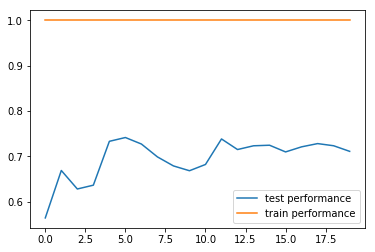

In [29]:
test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_3_r2_dtree'] = test_results.r2_test_score.values

plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()

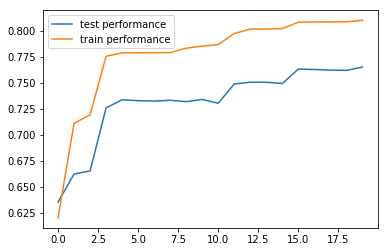

In [30]:
features_to_test = []
test_results = {}
for feature in performant_features.test_3:
    features_to_test.append(feature)
    test_results[feature] = run_model(Lasso(), 'lasso', 100,
                                      dataset_2[features_to_test],
                                      target_2)

test_results = pd.DataFrame(test_results).T
test_results = test_results.loc[features_to_test]
performant_features['test_3_r2_lasso'] = test_results.r2_test_score.values

plt.plot(range(len(features_to_test)), test_results.r2_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.r2_train_score, label='train performance')
plt.legend()    

In [31]:
performant_features

,test_1,test_1_r2,test_2,test_2_r2,test_3,test_3_r2_dtree,test_3_r2_lasso
0,PC 1,0.52441,OverallQual_10,0.0947046,PC 1,0.564312,0.63554
1,GrLivArea,0.609907,FullBath_3,0.109537,GrLivArea,0.668869,0.662442
2,GarageCars_3,0.704973,OverallQual_9,0.314819,PC 2,0.628067,0.665369
3,ExterQual_TA,0.708974,RoofMatl_WdShngl,0.323926,BsmtQual_Ex,0.636468,0.72597
4,FirstFlrSF,0.74056,TotRmsAbvGrd_12,0.311868,BsmtFinSF1,0.733137,0.733676
5,FullBath_1,0.742397,Neighborhood_NoRidge,0.375082,GarageArea,0.741512,0.7328
6,YearBuilt,0.745128,KitchenQual_Ex,0.407884,TotalBsmtSF,0.727177,0.732431
7,BsmtQual_Ex,0.771795,Neighborhood_Crawfor,0.405762,ScreenPorch,0.698815,0.733208
8,KitchenQual_TA,0.774039,OverallQual_8,0.538098,LotArea,0.678924,0.731901
9,Foundation_PConc,0.775191,GrLivArea,0.695339,FirstFlrSF,0.668312,0.734013
